# Train model CNN sử dụng Keras để nhận dạng chó mèo với độ chính xác 96.15%

# Nhóm 2 


1.   Ngô Thành Đại - 19445771
2.   Đặng Văn Chương - 19482991
3.   Nguyễn Dương Đức Tài - 19499931




# Nội dung báo cáo 
1. Giới thiệu sơ về Keras
2. Viết chương trình xây dụng model CNN
3. Deploy model lên website với Flask
4. Share mọi người cùng sử dụng model để nhận dạng chó mèo
5. Kết luận
---



#Giới thiệu về Keras



**1. Giới thiệu về Keras**


   
![Keras Logo](https://images.viblo.asia/full/6c041cf9-313b-4c90-bfd9-13fdf095091a.png)



Keras là một open source cho Neural Network được viết bởi ngôn ngữ Python. Nó là một library được phát triển bởi Francois Chollet, là một kỹ sư nghiên cứu Deep Learning. Keras được coi là một thư viện ‘high-level’ với phần ‘low-level’ (còn được gọi là backend) có thể là TensorFlow. Keras có cú pháp đơn giản hơn TensorFlow rất nhiều.. Một số ưu điểm của Keras như:


*   Dễ sử dụng, dùng đơn giản hơn Tensor, xây dựng model 
nhanh.
*   Run được trên cả CPU và GPU.
*  Hỗ trợ xây dựng CNN , RNN hoặc cả hai. Với những người mới tiếp cận đến DL thì nên chọn sử dụng Keras để build model vì nó đơn giản,dễ nắm bắt hơn các thư viện khác.

 

**2. Các bước xây dựng model sử dụng Keras**

* B1. Chuẩn bị dữ liệu
* B2. Load dữ liệu phần chia dữ liệu
* B3. Xây dựng model CNN
* B3. Compile model
* B4. Train model
* B5. Đánh giá model
* B6. Lưu model
* B7. Load model


![Sodo](https://miro.medium.com/max/1400/1*-5wlIFa3hdo-omU4EwZXdA.webp)







---



# Viết chương trình xây dựng Model

Liên kết Drive với Colab và kéo hết code vào trong Drive của mình để dễ quản lý , vì GG sẽ tự động xóa của mình sau 12h

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, shutil

##B1. Chuẩn bị dữ liệu

Chuẩn bị dữ liệu. Tải tập dữ liệu từ Kaggle "https://www.kaggle.com/competitions/dogs-vs-cats-redux-kernels-edition/data" sau đó lưu vào Drive để dễ quản lý

Bộ dữ liệu chứa 25.000 hình ảnh về chó và mèo (12.500 từ mỗi lớp). Sẽ tạo một tập dữ liệu mới chứa 3 tập con, tập Train với 8.000 mẫu của mỗi lớp (tổng cộng 16.000), tập Validate với 2250 mẫu của mỗi lớp và tập Test với 2250 mẫu của mỗi lớp

* Train: 8000 dogs, 8000 cats => 16000 hình
* Validate: 2250 dogs, 2250 cats => 4500 hình
* Test: 2250 dogs, 2250 cats => 4500 hình


In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

100% 812M/814M [00:25<00:00, 34.7MB/s]
100% 814M/814M [00:25<00:00, 34.0MB/s]


In [ ]:
! unzip dogs-vs-cats-redux-kernels-edition

Archive:  dogs-vs-cats-redux-kernels-edition.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.zip               


In [ ]:
! unzip /content/test.zip -d /content/drive/MyDrive

In [ ]:
! unzip /content/train.zip -d /content/drive/MyDrive

Tạo ra các folder để lưu tập dữ liệu Train, Test và Validation

In [ ]:
base_dir = '/content/drive/MyDrive/data_train_vali_test'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)


validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)


test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

Tiếp theo sau khi tạo thành công các foler. Tiến hành lấy ra vị trị hiện tại của các folder đã tạo ở trên

In [ ]:
original_dataset_dir = '/content/drive/MyDrive/train'
base_dir = '/content/drive/MyDrive/data_train_vali_test'


train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

Phần chia các tập dữ liệu như đã trình bày ở phần đầu

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(8000, 10250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(10250, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(8000, 10250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(10250, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In ra màn hình để kiểm tra phần chia dữ liệu đã đúng và thành công hay chưa

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total training images:', len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))
print()

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total validation images:', len(os.listdir(validation_cats_dir)) + len(os.listdir(validation_dogs_dir)))
print()

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))
print('total test images:', len(os.listdir(test_cats_dir)) + len(os.listdir(test_dogs_dir)))
print()

total training cat images: 8000
total training dog images: 8000
total training images: 16000

total validation cat images: 2250
total validation dog images: 2250
total validation images: 4500

total test cat images: 2250
total test dog images: 2250
total test images: 4500



Xây dựng hàm sử dụng Matplotlib để vẽ biểu đồ giữa accuracy và loss của model sau khi train

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()


Input của model là ảnh nên sẽ sử dụng convolutional neural network (CNN) với hình đầu vào là hình màu kích thước 224x224

Mô hình chung bài toán CNN: Input image -> Convolutional layer (Conv) + Pooling layer (Pool) -> Fully connected layer (FC) -> Output.

**Thiết kế Model**

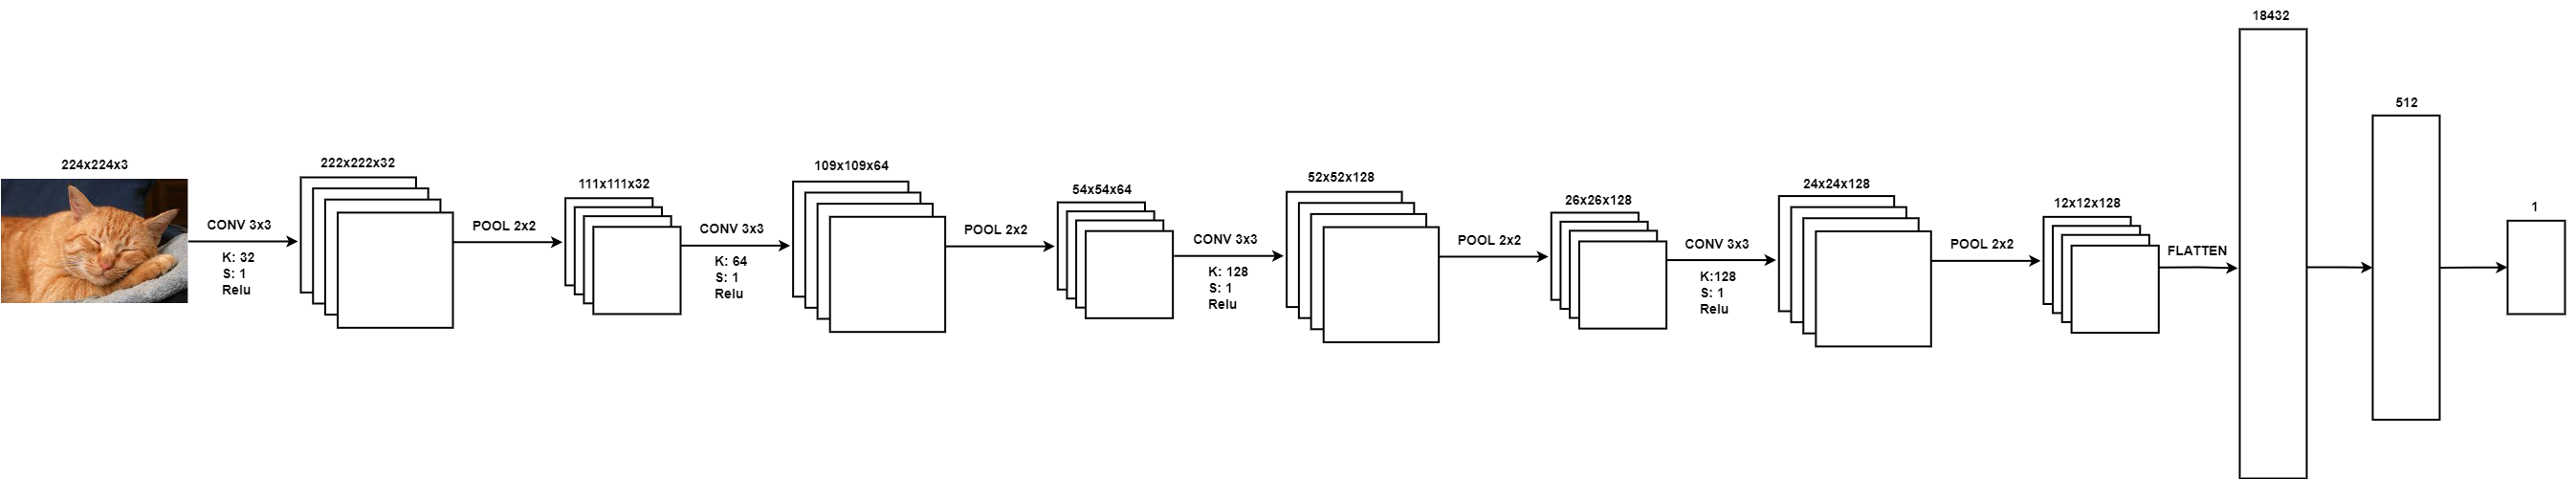



####Hàm kích hoạt (activation function) sử dụng

**Hàm Relu**


![relu](https://aicurious.io/posts/2019-09-23-cac-ham-kich-hoat-activation-function-trong-neural-networks/relu.svg)

Chức năng của hàm Relu : lọc các giá trị < 0


**Hàm Sigmoid**


![sigmoid](https://aicurious.io/posts/2019-09-23-cac-ham-kich-hoat-activation-function-trong-neural-networks/sigmoid.svg)


Chức năng của hàm Sigmoid: Hàm Sigmoid nhận đầu vào là một số thực và chuyển thành một giá trị trong khoảng (0;1). Đầu vào là số thực âm rất nhỏ sẽ cho đầu ra tiệm cận với 0, ngược lại, nếu đầu vào là một số thực dương lớn sẽ cho đầu ra là một số tiệm cận với 1


**Dropout**


Overfitting là hiện tượng mô hình tìm được quá khớp với dữ liệu training. Việc quá khớp này có thể dẫn đến việc dự đoán nhầm nhiễu, và chất lượng mô hình không còn tốt trên dữ liệu test nữa

Dropout với hệ số p nghĩa là trong quá trình train model, với mỗi lần thực hiện cập nhật hệ số ngẫu nhiên loại bỏ p% số lượng node trong layer đấy, hay nói cách khác là dữ lại (1-p%) node. Mỗi layer có thể có các hệ số dropout p khác nhau.

Dropout hạn chế việc overfitting

![dropout](https://i0.wp.com/nttuan8.com/wp-content/uploads/2019/04/Dropout.png?resize=768%2C382&ssl=1)

Khi ta dùng dropout như hình trên thì rõ ràng mô hình bên phải đơn giản hơn => tránh overfitting.


Hệ số p nên ở khoảng [0.2, 0.5] . Nếu p quá nhỏ thì không có tác dụng chống overfitting, tuy nhiên nếu p quá lớn thì gần như loại bỏ layer đấy và có dễ dẫn đến underfitting.



In [ ]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu')) #Thêm Fully Connected layer với 512 nodes và dùng hàm relu
model.add(layers.Dense(1, activation='sigmoid')) # Output layer với 1 node và dùng hàm sigmoide để dự đoán > 0.5 là chó <= 0.5 là mèo

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

 Xử lý ảnh

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Scale hình từ [0, 255] về [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), # giảm kích thước tất cả hình về như đã cho vào input của lớp Conv 224 x 224
    batch_size=50,
    class_mode='binary') # binary vì sử dung hàm loas là binary_crossentropy loss

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

Found 16000 images belonging to 2 classes.
Found 4500 images belonging to 2 classes.


Sau khi xử lý ảnh và xây dựng model các lớp tiến hành huấn luyện đối tượng

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=320, # 50 batches, mỗi lần lấy 50 dữ liệu => mât 320 vòng lặp để lấy hết 16000 hình => hoàn thành 1 epoch
    epochs=30,
    validation_data=validation_generator,
    validation_steps=90) # 90 x 50 = 4500  : 4500 hình validate

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
320/320 [==============================] - 130s 370ms/step - loss: 0.6200 - acc: 0.6426 - val_loss: 0.5386 - val_acc: 0.7296
Epoch 2/30
320/320 [==============================] - 102s 318ms/step - loss: 0.5319 - acc: 0.7326 - val_loss: 0.4979 - val_acc: 0.7604
Epoch 3/30
320/320 [==============================] - 104s 325ms/step - loss: 0.4828 - acc: 0.7660 - val_loss: 0.4679 - val_acc: 0.7711
Epoch 4/30
320/320 [==============================] - 102s 317ms/step - loss: 0.4445 - acc: 0.7957 - val_loss: 0.4617 - val_acc: 0.7698
Epoch 5/30
320/320 [==============================] - 101s 315ms/step - loss: 0.4152 - acc: 0.8087 - val_loss: 0.4154 - val_acc: 0.8011
Epoch 6/30
320/320 [==============================] - 100s 314ms/step - loss: 0.3915 - acc: 0.8226 - val_loss: 0.3872 - val_acc: 0.8282
Epoch 7/30
320/320 [==============================] - 101s 316ms/step - loss: 0.3708 - acc: 0.8350 - val_loss: 0.3737 - val_acc: 0.8293
Epoch 8/30
320/320 [============================

Vẽ biểu đồ với model vừa huấn luyện xong

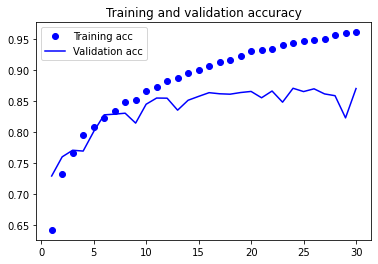

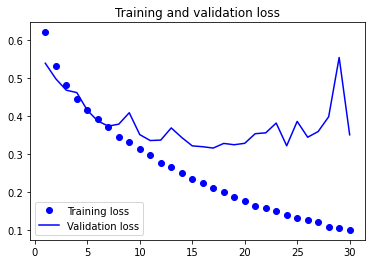

In [ ]:
plot_accuracy_and_loss(history)


Đánh giá, kiểm thử model với dữ liệu Test

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('Thử model với dữ liệu test:', test_acc)

Found 4500 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


Thử model với dữ liệu test: 0.8722222447395325


Và cuối cùng là lưu lại model

In [ ]:
model.save('/content/drive/MyDrive/Cat_Dog_Model.h5')

### Deploy model lên website với Flask

#  Kết luận

Nhóm xây dựng thành công model CNN sử dụng Keras để phân loại chó mèo với độ chính xác tương đối tốt.

Hiểu rõ hơn được những lý thuyết đã học trên lớp, hiểu rõ về CNN, cách xây dựng model thực tế 



